Let's say you are a machine learning engineer working for a clothing company and you want to adopt new strategies to improve the company's profit.

Use this dataset and the association rules mining to find new marketing plans. 

Note that one of the strategies can be based on which items should be put together

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Bonus: Try to do some visualization before applying the Apriori algorithm.

Let's do the same checkpoint but with a bigger dataset!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

Given Datasets

In [2]:
# Given dataset
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [3]:
# Data transfromation into one-hot-enconded
te = TransactionEncoder()
te_arry = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_arry, columns=te.columns_)

In [4]:
# Apriori algorithms
freq_itemsets = apriori(df, min_support=0.2, use_colnames=True)
freq_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.2,(Necklace)
...,...,...
146,0.2,"(Scarf, Heels, Earrings, Necklace, Hat)"
147,0.2,"(Pants, Scarf, Earrings, Skirt, Shirt)"
148,0.2,"(Pants, Scarf, Sneakers, Skirt, Hat)"
149,0.2,"(Pants, Sneakers, Sunglasses, Skirt, Hat)"


In [5]:
# Association rules
rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.6)

In [6]:
# Print the association rules
print(f'Association Rules: {rules}')

Association Rules:            antecedents                           consequents  \
0              (Heels)                               (Dress)   
1              (Dress)                               (Heels)   
2           (Necklace)                               (Dress)   
3            (Sandals)                               (Dress)   
4              (Dress)                               (Scarf)   
..                 ...                                   ...   
691  (Earrings, Dress)         (Scarf, Hat, Necklace, Heels)   
692    (Hat, Necklace)       (Scarf, Earrings, Dress, Heels)   
693  (Dress, Necklace)         (Scarf, Earrings, Hat, Heels)   
694       (Hat, Dress)    (Scarf, Earrings, Necklace, Heels)   
695         (Necklace)  (Scarf, Heels, Earrings, Hat, Dress)   

     antecedent support  consequent support  support  confidence  lift  \
0                   0.4                 0.4      0.4         1.0  2.50   
1                   0.4                 0.4      0.4         1.0

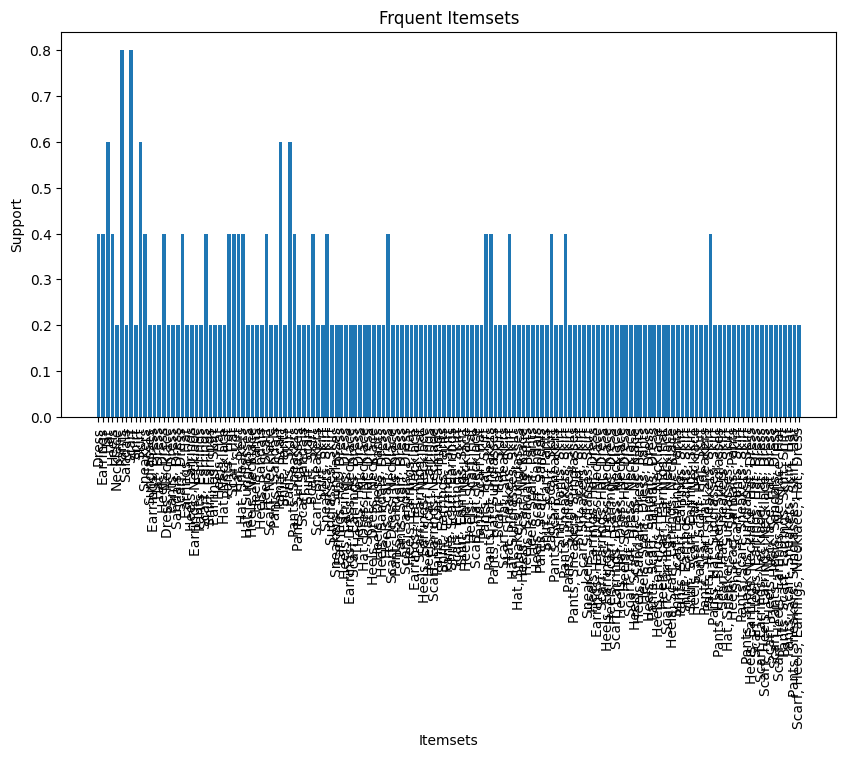

In [7]:
# Plot frequent items
plt.figure(figsize=(10,5))
plt.bar(range(len(freq_itemsets)), freq_itemsets.support, tick_label=freq_itemsets.itemsets.apply(lambda x: ', '.join(x)))
plt.xticks(rotation=90)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frquent Itemsets')
plt.show()

Bigger Dataset

In [65]:
# Load datasets
data = pd.read_csv('Market_Basket_Optimisation.csv')
data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Transforming the dataset
new_data = TransactionEncoder()
new_data_array = new_data.fit(data).transform(data)

In [69]:
# Converting the dataset to a Dataframe
basket = pd.DataFrame(new_data_array,columns=new_data.columns_)
basket

,,a,b,c,d,e,f,g,h,i,...,p,r,s,t,u,v,w,x,y,z
0,False,False,False,False,False,False,False,False,True,True,...,True,True,True,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,True,True,False,False,True,False,True,False,True,...,False,False,True,True,False,True,False,True,False,False
4,True,True,False,False,False,True,False,True,False,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
# Count the ocuurences of each items
items_counts = basket.sum().sort_values(ascending=False)
items_counts

a    15
     12
e    12
o    11
s    10
n    10
t     9
i     9
l     8
r     8
m     8
h     6
g     6
d     5
c     5
y     5
u     4
f     3
p     3
v     3
w     3
j     2
x     2
k     1
b     1
z     1
dtype: int64

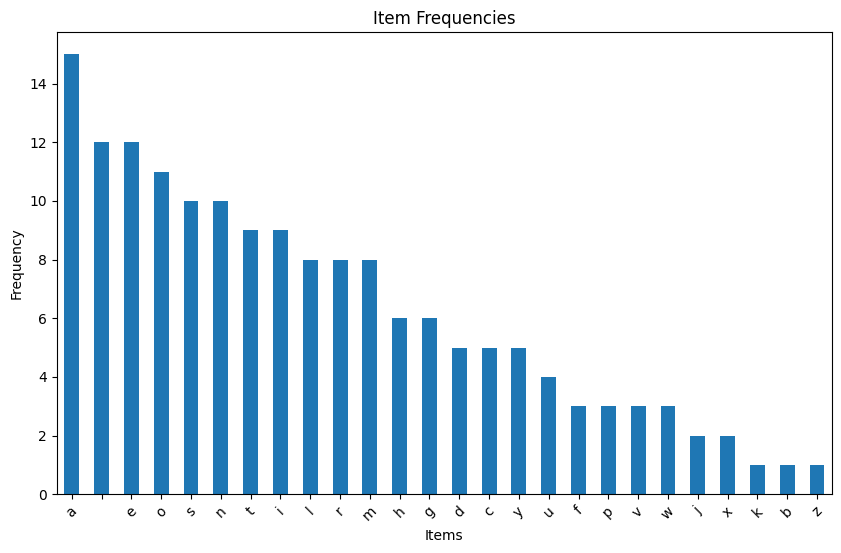

In [71]:
#Plot the item frequencies
plt.figure(figsize=(10,6))
items_counts.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Item Frequencies')
plt.xticks(rotation=45)
plt.show()

In [72]:
for i in basket.columns:
    if not i:
        print(i)

In [74]:
# Apriori ALgorithm
frequent_itemsets_large = apriori(dataf,min_support=0.01,use_colnames=True)
frequent_itemsets_large

,support,itemsets


There was no support value after lowering the support threshold which indicate that there is no relationship between the item, customer purchase the product at random

In [45]:
# Getting the association rules
rules_large = association_rules(frequent_itemsets_large, metric='confidence', min_threshold=0.01)

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.